In [69]:
import numpy as np
import cv2
import ImageView as iv
import eksplisitt as eks
import matplotlib.pyplot as plt
%matplotlib inline

lena = 'lena.png'
LFC = 'LFC.jpeg'

def eksplisitt(u,u_0, alpha, n):
    for i in range(n):
        u[1:-1, 1:-1] += alpha * (u[:-2, 1:-1] + u[2:, 1:-1] + u[1:-1, :-2] + u[1:-1, 2:]-4 * u[1:-1, 1:-1]) 
        u[0] = u_0[0]   #Dirichlet randbetingelser
        u[-1] = u_0[-1] #
    return u
   
def detectFace(file, title, scaleFactor = 1.5, minNeighbors = 5):
    """
    Oppdager et ansikt vendt mot kamera
   
    Parameters + some explanation
    ---------
    file         : Bildefil
                    Pathen til filen der original bildet befinner seg uten andvending
    scaleFactor  : int
                    Kompenserer i tilfelle noen ansikter er nærmere kamera enn andre
    minNeighbors : int
                    spesifiserer antall naboer en rektangel bør ha for å bli kalt et "ansikt"
    title        : text
                    Tittelen på bildet som er anvendt
    """
    image = cv2.imread(file) #leser inn bildet
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #importerer haarscade biblioteket
    
    faces = face_cascade.detectMultiScale(image, scaleFactor, minNeighbors)
    
    for (x,y,w,h) in faces:
        RoI = image[y:y+h ,x:x+w]                       #Region of Interest --> ansiktet  
        RoI = RoI.astype(dtype = float)
        blur = eksplisitt(RoI,image[y:y+h ,x:x+w], 0.25,250)               
        image[y:y+h ,x:x+w] = blur
    
    print(len(faces), "ansikt registrert")               #teller opp antall ansikt funnet og skriver de ut
        
    iv.singleView(image,title)                   #displayer bildet

1 ansikt registrert


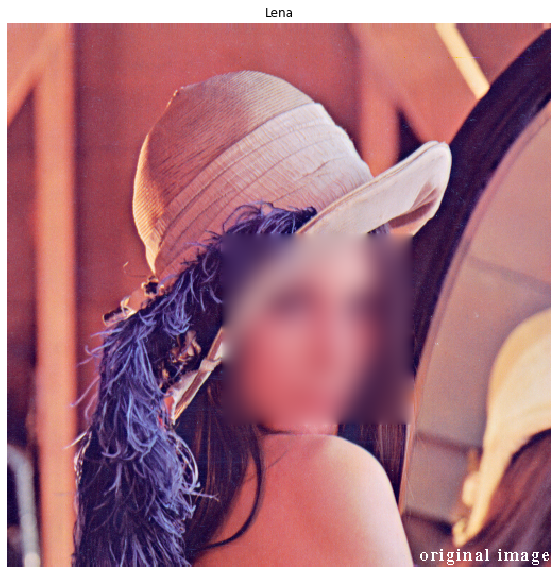

In [70]:
detectFace(lena, "Lena")

5 ansikt registrert


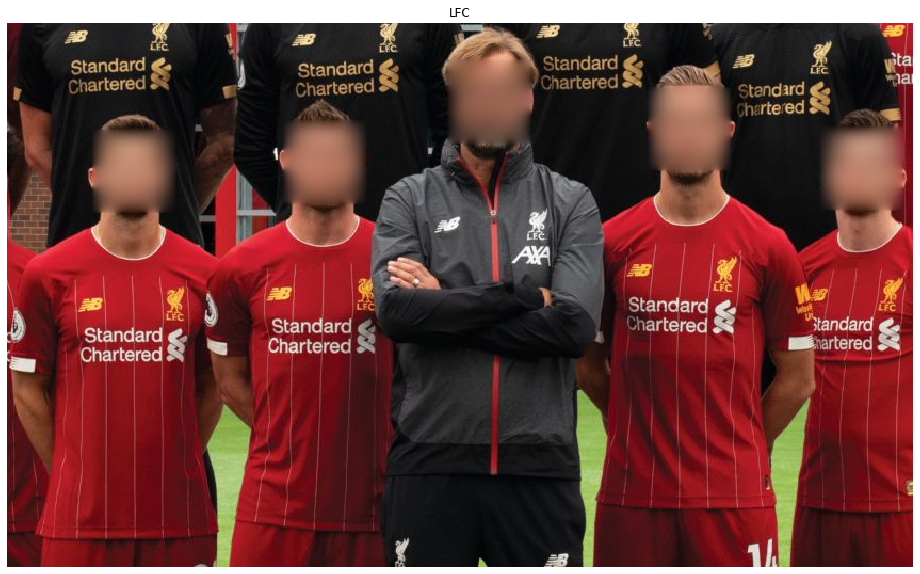

In [62]:
detectFace(LFC, "LFC")